# Introduction to Plotting with Matplotlib

[Matplotlib](http://matplotlib.org/) is a standard plotting package for python.

## Preliminaries

Show plots in the notebook.

In [1]:
%matplotlib inline

Import several modules which will be useful for doing plots.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Scatter Plots

Here we will play with the basics of plotting data and creating simple figures.
In matplotlib there are sometimes several ways to make simple figures, but we'll start with an easy way.

### Single-panel plots

In [3]:
data = np.genfromtxt('hcn_hco+.dat',
                     usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9),
                     dtype=[('LprimeHCN', float),
                            ('LprimeerrHCN', float),
                            ('HCNlim', int),
                            ('LprimeHCO', float),
                            ('LprimeerrHCO', float),
                            ('HCOlim', int),
                            ('PAH62', float),
                            ('PAH62err', float),
                            ('PAH62lim', int)])

Now, do some processing of the data, to compute the line ratio and extract only valid ratios.

In [4]:
ratio = data['LprimeHCN'] / data['LprimeHCO']
ratioerr = ratio * np.sqrt((data['LprimeerrHCN']/data['LprimeHCN'])**2 + 
                           (data['LprimeerrHCO']/data['LprimeHCO'])**2)

# work out which ratios are valid (i.e., not both upper and lower limits)
# and which ratios are which types of limits
valid = np.invert(np.logical_and(data['HCNlim'], data['HCOlim']))
nolim = np.invert(np.logical_or(data['HCNlim'], data['HCOlim']))
uplim = (valid * data['HCNlim']) > 0
lolim = (valid * data['HCOlim']) > 0

Now, let's plot the data, HCN/HCO+ agains PAH EQW.

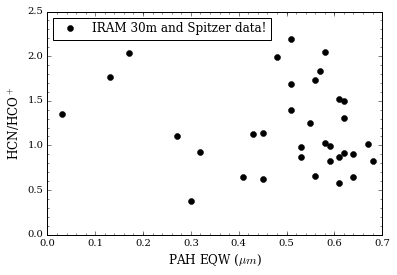

In [5]:
# create a "figure"
f = plt.figure()
plt.plot(data['PAH62'][nolim],
         ratio[nolim],
         marker='o',
         color='black',
         linestyle='',
         label='IRAM 30m and Spitzer data!')

# let's label our axes
plt.xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
plt.ylabel(r'HCN/HCO$^+$', fontsize='large')

# i like showing minor tickmarks
plt.minorticks_on()

# let's show a legend
plt.legend(loc='best', frameon=True)

That's okay, but what do the error bars look like?

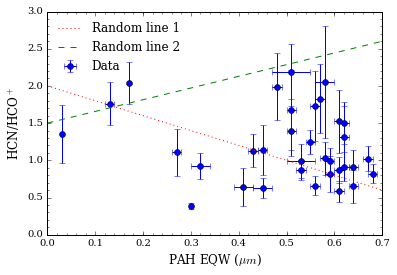

In [6]:
plt.figure()
plt.errorbar(data['PAH62'][nolim],
             ratio[nolim],
             marker='o',
             linestyle='',
             xerr=data['PAH62err'][nolim],
             yerr=ratioerr[nolim],
             label='Data')
plt.xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
plt.ylabel(r'HCN/HCO$^+$', fontsize='large')
plt.minorticks_on()

# there's no simple theoretical model for this, so let's just plot a couple lines
# on top of the data
plt.plot([0,0.7],
         [2.0, 0.6],
         color='red',
         linestyle=':',
         label='Random line 1')
plt.plot([0,0.7],
         [1.5, 2.6],
         color='green',
         linestyle='--',
         label='Random line 2')
plt.legend(loc='best', frameon=False)

But we should plot our limits as well.

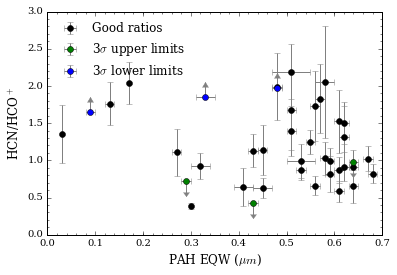

In [7]:
plt.figure()
plt.minorticks_on()
plt.errorbar(data['PAH62'][nolim],
             ratio[nolim],
             marker='o',
             color='black',
             linestyle='',
             ecolor='gray',
             xerr=data['PAH62err'][nolim],
             yerr=ratioerr[nolim],
             label='Good ratios')
plt.xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
plt.ylabel(r'HCN/HCO$^+$', fontsize='large')
# we can issue multiple plot commands to put things on the same figure axes
# (dividing and multiplying by 3 to make them 3-sigma limits)
nlim = len(data['PAH62'][uplim])
arrowlen = 0.2 * np.ones(nlim)
plt.errorbar(data['PAH62'][uplim],
             3*ratio[uplim],
             marker='o',
             color='green',
             linestyle='',
             xerr=data['PAH62err'][uplim],
             yerr=arrowlen,
             ecolor='gray',
             uplims=True,
             label=r'3$\sigma$ upper limits')
nlim = len(data['PAH62'][lolim])
arrowlen = 0.2 * np.ones(nlim)
plt.errorbar(data['PAH62'][lolim],
             ratio[lolim]/3.,
             marker='o',
             color='blue',
             linestyle='',
             xerr=data['PAH62err'][lolim],
             yerr=arrowlen,
             ecolor='gray',
             lolims=True,
             label=r'3$\sigma$ lower limits')
plt.legend(loc='best', frameon=False)

Let's colorize the points by something. How about the PAH EQW?

There are [lots of colormaps](http://matplotlib.org/users/colormaps.html), but we'll use `viridis`, since it's perceptual and colorblind-friendly.

Here we'll plot the points separately from their limits.

I'll leave adding the upper limits as an exercise for the reader :)

(0, 3.0)

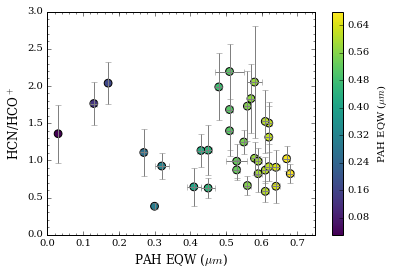

In [8]:
plt.figure()
plt.minorticks_on()
# first plot the errobars 
plt.errorbar(data['PAH62'][nolim],
             ratio[nolim],
             marker='',
             linestyle='',
             ecolor='gray',
             xerr=data['PAH62err'][nolim],
             yerr=ratioerr[nolim])

# now, overplot the points colored by PAH EQW
plt.scatter(data['PAH62'][nolim],
            ratio[nolim],
            s=60,
            c=data['PAH62'][nolim],
            cmap=plt.get_cmap('viridis'))
plt.xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
plt.ylabel(r'HCN/HCO$^+$', fontsize='large')

# show and label the color bar
cbar = plt.colorbar()
cbar.set_label(r'PAH EQW ($\mu m$)')

# manually set the scaling, because otherwise it goes past 0 on the x-axis
plt.xlim([0,0.75])
# this is the same as the autoscaling for the y-axis, but just to show you can
# adjust it too
plt.ylim([0, 3.])

### Histograms and Boxplots

Let's start with a standard histogram. We'll let matplotlib pick the bins, but you can provide your own as an array via the `bins` argument.

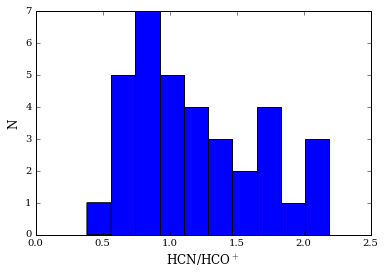

In [9]:
n, bins, patches = plt.hist(ratio[nolim])
plt.xlabel(r'HCN/HCO$^+$', fontsize='large')
plt.ylabel('N', fontsize='large')

Let's pick our own bins now.

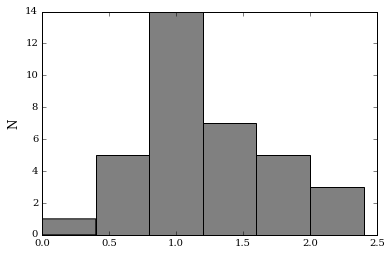

In [10]:
mybins = np.arange(0, 2.5, 0.4)
n, bins, patches = plt.hist(ratio[nolim],
                            bins=mybins,
                            color='gray',
                            normed=False) 
plt.ylabel('N', fontsize='large')

Let's revisit the plot of the HCN/HCO+ ratio against PAH EQW, and look at the distribution of points, via a boxplot.

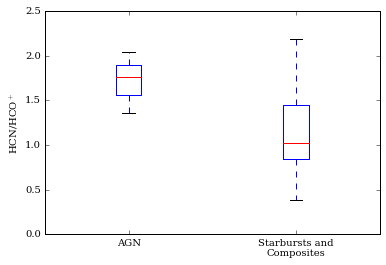

In [11]:
plt.boxplot([ratio[nolim][data[nolim]['PAH62']<0.2],
             ratio[nolim][data[nolim]['PAH62']>=0.2]],
            labels=['AGN', 'Starbursts and\nComposites'])
plt.ylabel(r'HCN/HCO$^+$')

### Multi-Panel Figures

Let's say we want to show the boxplot and the data next to each other. How do we do that?

(1, 2)


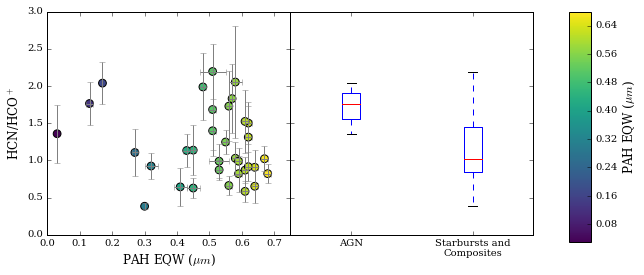

In [12]:
fig, ax = plt.subplots(1, 2,
                       sharey=True,
                       squeeze=False,
                       figsize=(10,4))
# now, ax is a 1x2 array
print(ax.shape)

# we can do the same commands as above. But now instead of issuing plot commands
# via "plt.", we assign them directly to the axes.
ax[0][0].errorbar(data['PAH62'][nolim],
             ratio[nolim],
             marker='',
             linestyle='',
             ecolor='gray',
             xerr=data['PAH62err'][nolim],
             yerr=ratioerr[nolim])

# now, overplot the points colored by PAH EQW
im = ax[0][0].scatter(data['PAH62'][nolim],
                      ratio[nolim],
                      s=60,
                      c=data['PAH62'][nolim],
                      cmap=plt.get_cmap('viridis'))

# setting labels using the axis is slightly different
ax[0][0].set_xlabel(r'PAH EQW ($\mu m$)', fontsize='large')
ax[0][0].set_ylabel(r'HCN/HCO$^+$', fontsize='large')

# show and label the color bar
#cbar = ax[0][0].colorbar()
#cbar.set_label(r'PAH EQW ($\mu m$)')

# manually set the scaling, because otherwise it goes past 0 on the x-axis
ax[0][0].set_xlim([0,0.75])
# this is the same as the autoscaling for the y-axis, but just to show you can
# adjust it too
ax[0][0].set_ylim([0, 3.])

ax[0][1].boxplot([ratio[nolim][data[nolim]['PAH62']<0.2],
             ratio[nolim][data[nolim]['PAH62']>=0.2]],
            labels=['AGN', 'Starbursts and\nComposites'])

# now let's make the two plots without any space between them
fig.subplots_adjust(hspace=0, wspace=0)

# adding a colorbar is slightly more complicated when doing subplots.
# here's one way...
# not we added a "im =", to the scatter plot for this.
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.03, 0.8])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'PAH EQW ($\mu m$)', fontsize='12')